<a href="https://colab.research.google.com/github/Ravishankarkollapudi/RaviShankarKollapudi_IT533/blob/main/RaviShankar_Module_7_kNN_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 6: CLASSIFICATION: k Nearest Neighbor and Naive Bayes**


#** Preparation and Setup**
For these explanations, we will need a model with a dependent attribute that is categorical. The typical explanation uses the famous [iris flower dataset](https://github.com/shstreuber/Data-Mining/blob/master/data/iris.csv), which even has [its own wikipedia page](https://en.wikipedia.org/wiki/Iris_flower_data_set). However, we will use the insurance dataset because it allows us to tackle actual real-world problems. Since we will be working with two different types of classification, the first one called k Nearest Neighbor, and the second on called Naive Bayes, we will import all the libraries upfront.

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import spatial
import statsmodels.api as sm

from IPython.display import HTML # This is just for me so I can embed videos
from IPython.display import Image # This is just for me so I can embed images

#Reading in the data as insurance dataframe
Bollywood = pd.read_csv("https://raw.githubusercontent.com/Ravishankarkollapudi/RaviShankarKollapudi_IT533/main/BollywoodActorRanking.csv")

#Verifying that we can see the data
Bollywood.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


actorId         actorName  ...  normalizedGoogleRank  normalizedRating
0      373        Aamir Khan  ...               7.34283          10.00000
1      374    Shah Rukh Khan  ...               7.88458           9.22674
2      375       Salman Khan  ...              10.00000           9.20821
3      376      Katrina Kaif  ...               6.46570           8.94852
4      377  Deepika Padukone  ...               8.73591           8.62716

[5 rows x 8 columns]

## 1. k Nearest Neighbor

##**1.1 Nearest Neighbor Algorithm**
So, in a nutshell, the k Nearest Neighbor Algorithm works like this:
1. Load the data
2. Initialize K to your chosen number of neighbors
3. For each example in the data: 
  
  3.1 Calculate the distance between the query example and the current example from the data.
  
  3.2 Add the distance and the index of the example to an ordered collection
4. Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
5. Pick the first K entries from the sorted collection
6. Get the labels of the selected K entries
7. If classification, return the mode of the K labels

To work with the k Nearest Neighbor algorithm, we use its library from the scikit learn package. We will also learn a new way to build training and test sets (with a process called cross-validation), so we are importing that package, too. Lastly, we will be generating "pretty pictures"--so, matplotlib is going to help us out with that.



In [ ]:
# We import all the kNN libraries

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

from sklearn import neighbors, datasets
from sklearn.model_selection import cross_val_score, train_test_split
%matplotlib inline 

In [ ]:
Bollywood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   actorId               301 non-null    int64  
 1   actorName             301 non-null    object 
 2   movieCount            301 non-null    int64  
 3   ratingSum             301 non-null    int64  
 4   normalizedMovieRank   299 non-null    float64
 5   googleHits            301 non-null    int64  
 6   normalizedGoogleRank  189 non-null    float64
 7   normalizedRating      301 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 18.9+ KB


In [ ]:
Bollywood2 = pd.DataFrame(Bollywood, columns = ['actorId', 'ratingSum', 'normalizedMovieRank','googleHits','normalizedGoogleRank','normalizedRating','movieCount'])
Bollywood2['googleHits'] = Bollywood2['googleHits'].replace(np.nan, 0)
Bollywood2['normalizedGoogleRank'] = Bollywood2['normalizedGoogleRank'].replace(np.nan, 0)
Bollywood2['normalizedMovieRank'] = Bollywood2['normalizedMovieRank'].replace(np.nan, 0)
Bollywood2.head()

actorId  ratingSum  ...  normalizedRating  movieCount
0      373       1170  ...          10.00000          11
1      374       2000  ...           9.22674          23
2      375       2340  ...           9.20821          36
3      376       1640  ...           8.94852          17
4      377       1080  ...           8.62716          16

[5 rows x 7 columns]

In [ ]:
Bollywood2.movieCount.unique()

array([11, 23, 36, 17, 16, 37,  6, 27, 48,  8,  4, 49,  5, 54,  7, 26, 19,
        9, 34, 12, 43, 20, 18, 15, 32, 10, 14, 24, 30, 22, 25, 42, 13, 21,
       33,  0])

In [ ]:
 pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip # Installing the package first

     |████████████████████████████████| 34.6MB 80kB/s 
     |████████████████████████████████| 10.1MB 5.9MB/s 
     |████████████████████████████████| 645kB 39.4MB/s 
     |████████████████████████████████| 112kB 46.9MB/s 
     |████████████████████████████████| 1.1MB 36.2MB/s 
     |████████████████████████████████| 3.1MB 35.8MB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
     |████████████████████████████████| 81kB 9.4MB/s 
     |████████████████████████████████| 296kB 38.1MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.0.0-py2.py3-none-any.whl size=248525 sha256=1784f94c467e1ea0efa8f486e4c62eaf3bb6fdaaf9f44fcd2c5e8250ba2a1111
  Stored in directory: /tmp/pip-ephem-wheel-cache-8f2jip3h/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27099 sha256=05e18bdef736e6341a748d89d8ee303d7986e4b280d51a27e43e429405b2522d
  Stored in directory: /root/.cache/pip/wheels

In [ ]:
import pandas_profiling # Now we load the package
Bollywood2.profile_report()

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 1.3 Setting up Training and Test Sets

In [ ]:
x=Bollywood2.iloc[:,:6] # all parameters
y=Bollywood2['movieCount'] 

print(x) # Uncomment this line to verify your parameters/ independent variables/ attributes/ features
print(y) # Uncomment this line to verify your class labels

     actorId  ratingSum  ...  normalizedGoogleRank  normalizedRating
0        373       1170  ...               7.34283          10.00000
1        374       2000  ...               7.88458           9.22674
2        375       2340  ...              10.00000           9.20821
3        376       1640  ...               6.46570           8.94852
4        377       1080  ...               8.73591           8.62716
..       ...        ...  ...                   ...               ...
296      669         80  ...               0.00000           1.00000
297      670        100  ...               0.00000           1.00000
298      671        100  ...               0.00000           1.00000
299      672          0  ...               0.00000           4.74000
300      673          0  ...               0.00000           4.80000

[301 rows x 6 columns]
0      11
1      23
2      36
3      17
4      16
       ..
296     4
297     5
298     5
299     0
300     0
Name: movieCount, Length: 301, dtype: 

Now that we have separated the x attributes (independent variables) and the y attribute (class attribute, dependent variable), we build our training and test sets! 

NOTE that we are not allocating any sizes for the train_test_split below. This will invoke the default, which is a 75% training/ 25% test split.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)

# So, what training data do we have?
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (225, 6)
y_train shape: (225,)


## 1.4 Building the Simplest Model with k=1

Remember that, in kNN classification, the output is class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

In [ ]:
# This is the model with the one nearest neighbor. Note the output shows that the metric is set to minkowski, 
# but the p is set to 2, which means that we are using Euclidian distance (1 = Manhattan distance)

from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors = 1)
model1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

###**1.4.1 Testing the Model**

As you can see, we have built model1, which is the kNN model with just 1 nearest neighbor. Next, we test it.

We use y_pred to store the calculated y values (remember y hat?) that the model gives us. Then we can compare them with the actual y values that we know and see what percentage the model identified correctly.

In [ ]:
y_pred = model1.predict(X_test)
print("Test set predictions: \n {}".format(y_pred))

Test set predictions: 
 [ 7 12  7  4 34  5  5  7  7  4 11  7 11  9  9  9  4 11  5 42 12 33  8  5
  4  4  5  8  8 26 11  4 10  6  4  5  5  8  4  4 23 11  8  5  9  4  6 17
  4 16 10  5  4 14 14  7  6  8 16 11 24  9  4  5  4  4  4 14  8 24  7  9
  4 14 33  9]


###**1.4.2 Evaluating the model**
Here, we use three critical methods to get an idea of how "good" our model really is.


####1.4.2.1 The Accuracy Score

In [ ]:
# Accuracy score
print("Test set score: {:.2f}".format(model1.score(X_test, y_test)))

Test set score: 0.38


####1.4.2.2 Data Inspection Calculated vs. Actual values

In [ ]:
# Let's compare the actual y and the predicted y

realvsmodel1 = pd.DataFrame(y_pred,y_test)
realvsmodel1 = pd.DataFrame({'predicted':y_pred,'original':y_test})
realvsmodel1.head()

predicted  original
223          7        10
150         12        15
226          7         6
296          4         4
52          34        32

####1.4.2.3 The Confusion Matrix

A confusion matrix compares the calculated or predicted values for all labels in the class attribute with the actual, true values that we know. In other words, we check which true values were predicted correctly and which were predicted incorrecty. For this purpose, we will use the plot_confusion_matrix group from the scikit-learn.metrics library.

A longer, more mathematical, explanation is [here](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/).

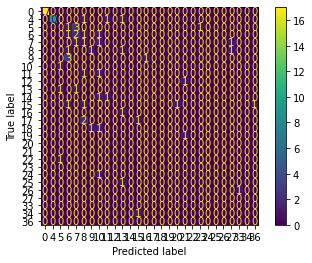

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model1, X_test, y_test)

###1.4.2.4 The Classification Report

The Classification Report gives us even more insights into how well (or, in our case, badly) our model performs. To read it correctly, we first have to define a few terms:
1. **precision** (also called positive predictive value) is the number of correctly identified positive results divided by the number of all positive results, including those not identified correctly ((true positives) / (true positives + false positives)). Said another way, “for all instances classified positive, what percent was correct?”
2. **recall** (also known as sensitivity) is the number of correctly identified positive results divided by the number of all samples that should have been identified as positive ((true positives) / (true positives + false negatives)). Said another way, “for all instances that were actually positive, what percent was classified correctly?
3. **f-1 score** is the harmonic mean of the precision and recall. The highest possible value of F1 is 1, indicating perfect precision and recall, and the lowest possible value is 0, if either the precision or the recall is zero. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.
3. **support** is the number of actual occurrences of the class in the specified dataset.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=['11', '23', '36', '17', '16', '37',  '6', '27', '48',  '8',  '4', '49',  '5', '54',  '7', '26', '19',
        '9', '34', '12', '43', '20', '18', '15', '32', '10', '14', '24', '30', '22', '25', '42', '13', '21',
       '33',  '0']))

              precision    recall  f1-score   support

          11       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         0
          36       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         4
          37       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         5
          27       0.00      0.00      0.00         1
          48       0.00      0.00      0.00         0
           8       0.14      0.25      0.18         4
           4       1.00      1.00      1.00        17
          49       0.00      0.00      0.00         0
           5       1.00      0.77      0.87        13
          54       0.00      0.00      0.00         0
           7       0.14      0.20      0.17         5
          26       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         3
           9       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **1.5 Building kNN with 5 nearest neighbors (and a 2/3 to 1/3 train/ test split)**
Given our less-than fabulous results above, let's see if instead of assigning the class label from only 1 nearest neighbor, we can increase the accuracy of our predictions by looking at the class labels for the 5 nearest neighbors!

###1.5.1 Setting up Training and Test Set
Note how here, we use the test_size parameter to split 2/3 of the data into the training set and 1/3 into the test set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.33)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (201, 6)
y_train shape: (201,)
X_test shape: (100, 6)
y_test shape: (100,)


###1.5.2 Building the model with k=5

In [ ]:
model5 = neighbors.KNeighborsClassifier(n_neighbors=5)

model5.fit(X_train, y_train)

y_pred = model5.predict(X_test)
print(y_pred)
 
                     

[ 7  8  6  5  6  7  4  4  6  6  4  5  5  5  8 12  9  9  9  4  4  6  9  9
 16  8  5  9  9  6 12 16  8  7  4  4  4  5  7  6  7  6  9  8  5  9  5  4
  5  4  5  5  5 10  9 10  4  6  8  5  6 10  4  6  5 10 11 15  5  5 16  4
  9  9  6  4  5  4 12  6 11  6  9  7  9  4  5  4  6  4  8  6  4  6  9  5
  5  5  8  5]


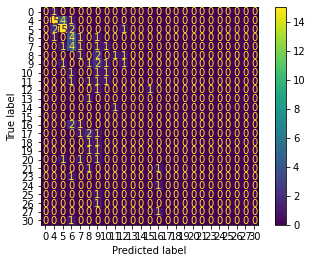

In [ ]:
plot_confusion_matrix(model5, X_test, y_test)

In [ ]:
print(classification_report(y_test, y_pred, labels=['11', '23', '36', '17', '16', '37',  '6', '27', '48',  '8',  '4', '49',  '5', '54',  '7', '26', '19',
        '9', '34', '12', '43', '20', '18', '15', '32', '10', '14', '24', '30', '22', '25', '42', '13', '21',
       '33',  '0']))

              precision    recall  f1-score   support

          11       0.00      0.00      0.00         4
          23       0.00      0.00      0.00         2
          36       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         3
          37       0.00      0.00      0.00         0
           6       0.24      0.57      0.33         7
          27       0.00      0.00      0.00         1
          48       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         5
           4       0.79      0.75      0.77        20
          49       0.00      0.00      0.00         0
           5       0.68      0.75      0.71        20
          54       0.00      0.00      0.00         1
           7       0.17      0.12      0.14         8
          26       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         2
           9       0.13    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##**1.6 Optimizing k with Cross-Validation**
We could spend entire days re-running the kNN and increasing k by 1 until we've found the best value for k. But that would be 1. boring, 2. too much work, 3. not efficient, given that we could instead just cycle through a list of values until we've found the best one. 

To achieve this in sa most efficient way, we will need to use another trick (aka a preprocessing method) that we haven't encountered yet: **Cross-validation.** Find out [in this detail description](https://machinelearningmastery.com/k-fold-cross-validation/) how cross-validation works. [This graphic](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png) will also help you understand. Or watch this 5-minute video:

This what we'll do now. Let's go!

First, we build a list of potential k values. Then we create an empty list that will hold cross-validation scores.

In [ ]:
# To determine how to pick k, we are first creating a list of potential k values
klist = list(range(1,100,2)) # Our list goes from 1 to 100 in increments of 2

# Then we create an empty list that will hold cross-validation scores
cv_scores = []
print(klist)



[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]


Now we can build our cross-validation. We will cycle through our k values from the k-value list and store the accuracy scores in the cv_scores list. To make things easier on us, we will convert the accuracy score into its opposite--the misclassification error. This misclassification error is really the average of all the misclassifications for one run of k.

In [ ]:
# Perform 10-fold cross validation for each k value (we have a small dataset, so we can do this)
for k in klist:
    model10 = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model10, x, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Changing to misclassification error
errors = 1- np.array(cv_scores)
print(errors)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class

[0.59387097 0.64053763 0.65376344 0.67709677 0.72021505 0.71709677
 0.70387097 0.73397849 0.7472043  0.72387097 0.71408602 0.72397849
 0.72064516 0.73397849 0.73075269 0.73086022 0.73075269 0.74075269
 0.73408602 0.74408602 0.74075269 0.74365591 0.72032258 0.73043011
 0.75698925 0.75698925 0.74698925 0.75032258 0.74698925 0.76698925
 0.75053763 0.75376344 0.73763441 0.73752688 0.72752688 0.73763441
 0.75709677 0.74096774 0.75096774 0.75107527 0.7544086  0.74774194
 0.75430108 0.75752688 0.75086022 0.75752688 0.75752688 0.75419355
 0.75752688 0.75419355]


NOW we can use the error number to determine the optimal k! To do so, we look at our errors and pick the row with the k value that produced the smallest error. 

To make things easier to understand, we plot the misclassification errors in comparison to k so we can see our results.

The optimal number of neighbors is 1


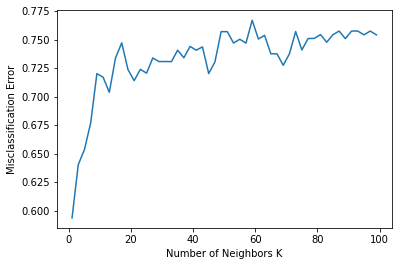

In [ ]:
optimal_k = klist[np.argmin(errors)]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(klist, errors)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

# **2. Naive Bayes**
Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. 



##**2.1 Setting up the Environment**
We will be working with Scikit-Learn again. More specifically, we will be working with the Gaussian Naive Bayes algorithm. 

In [ ]:
from sklearn.naive_bayes import GaussianNB
from pandas import Series
from numpy.random import randn
from sklearn.metrics import accuracy_score

In [ ]:
#Let's verify that the dataset is still what it needs to be:
Bollywood2.head()

actorId  ratingSum  ...  normalizedRating  movieCount
0      373       1170  ...          10.00000          11
1      374       2000  ...           9.22674          23
2      375       2340  ...           9.20821          36
3      376       1640  ...           8.94852          17
4      377       1080  ...           8.62716          16

[5 rows x 7 columns]

In [ ]:
Bollywood2.dtypes

actorId                   int64
ratingSum                 int64
normalizedMovieRank     float64
googleHits                int64
normalizedGoogleRank    float64
normalizedRating        float64
movieCount                int64
dtype: object

##**2.2 Setting up the training and test sets**

In [ ]:
ins_train, ins_test = train_test_split(Bollywood2, test_size = 0.2)
print(ins_train)
print(ins_test)

     actorId  ratingSum  ...  normalizedRating  movieCount
8        381        890  ...           7.69864          11
273      646        110  ...           1.11151           5
269      642         90  ...           1.13938           4
21       394        780  ...           6.00856          16
233      606        120  ...           1.59135           6
..       ...        ...  ...               ...         ...
268      641         90  ...           1.13938           4
211      584        180  ...           1.89206           5
79       452        860  ...           3.38092          25
224      597        140  ...           1.70618           7
252      625        100  ...           1.27877           4

[240 rows x 7 columns]
     actorId  ratingSum  ...  normalizedRating  movieCount
145      518        180  ...           2.51605           5
240      613        120  ...           1.55754           4
232      605        120  ...           1.59165           6
284      657        100  ...    

In [ ]:
ins_train_np = np.array([ins_train])
ins_test_np = np.array([ins_test])
print(ins_train_np)
print(ins_test_np)

[[[381.         890.           6.95849991 ...   5.79496002   7.69863987
    11.        ]
  [646.         110.           1.19564998 ...   0.           1.11151004
     5.        ]
  [642.          90.           1.24457002 ...   0.           1.13937998
     4.        ]
  ...
  [452.         860.           2.40869999 ...   2.76887989   3.38091993
    25.        ]
  [597.         140.           1.         ...   1.23907006   1.70617998
     7.        ]
  [625.         100.           1.48913002 ...   0.           1.27876997
     4.        ]]]
[[[5.18000000e+02 1.80000000e+02 2.56522012e+00 3.81000000e+04
   1.09485996e+00 2.51605010e+00 5.00000000e+00]
  [6.13000000e+02 1.20000000e+02 1.97826004e+00 0.00000000e+00
   0.00000000e+00 1.55754006e+00 4.00000000e+00]
  [6.05000000e+02 1.20000000e+02 1.00000000e+00 1.61000000e+04
   1.03810000e+00 1.59165001e+00 6.00000000e+00]
  [6.57000000e+02 1.00000000e+02 1.00000000e+00 0.00000000e+00
   0.00000000e+00 1.00000000e+00 5.00000000e+00]
  [6.10000

##**2.3 Building the model with GaussianNB()**

In [ ]:
ins_naivebayes = GaussianNB()
ins_naivebayes

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
ins_naivebayes.fit(ins_train[['actorId', 'ratingSum', 'normalizedMovieRank','googleHits','normalizedGoogleRank','normalizedRating']], ins_train['movieCount'])

GaussianNB(priors=None, var_smoothing=1e-09)

##**2.4 Testing the model and calculating the accuracy score**

In [ ]:
ins_predictions = ins_naivebayes.predict(ins_test[['actorId', 'ratingSum', 'normalizedMovieRank','googleHits','normalizedGoogleRank','normalizedRating']])
accuracy_score(ins_test['movieCount'], ins_predictions)

0.2459016393442623

In [ ]:
realvsmodel2 = pd.DataFrame(ins_predictions)
realvsmodel2 = pd.DataFrame({'predicted':ins_predictions,'original':ins_test['movieCount']})
realvsmodel2.head()

predicted  original
145          4         5
240          4         4
232          4         6
284          4         5
237          4         5

## INTERPRET OF PROCESS
 1. Data has been processed to run with K-Neighbour and Naive Bayes and the raw data has been retrived from github.

 2. We also created a 2/3 to 1/3 split between Training and Test for processed data at 1.3

 3.Confusion Matrix and a Classification report has been calculated by running K-Neighbour with K=1

 4.Calculated the Accuracy by Optimizing K for K-Neighbour then both Confusion MAtrix and Classification report are done

 5.Ran Naive Bayesand created a confusion matrix and a classification report 

## 